<a href="https://colab.research.google.com/github/LeixD810/20229540-API-presentation/blob/main/20229540_Le_Nguyen_Thai_Duong_Presentation_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

H1: Male driver tend to get arrested more than female driver

H2: Getting arrested is associated with driver age

H3: Getting arrested is associated with driver race

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [ ]:
#install kaggle api
!pip install -q kaggle

In [ ]:
# upload kaggle api key
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
#search for dataset
!kaggle datasets list -s ['Stanford Open Policing Project']

ref                                                                     title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
faressayah/stanford-open-policing-project                               Stanford Open Policing Project                     772KB  2019-10-06 19:33:24           1352         43  0.9411765        
stanford-open-policing/stanford-open-policing-project-california        Stanford Open Policing Project - California        123MB  2017-07-10 20:41:07            580         19  0.875            
stanford-open-policing/stanford-open-policing-project-texas             Stanford Open Policing Project - Texas             403MB  2017-07-11 00:22:51            425         16  0.875            
stanford-open-policing/st

In [ ]:
#Download the dataset
!kaggle datasets download -d faressayah/stanford-open-policing-project

stanford-open-policing-project.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#Create a folder to store dataset
!mkdir /content/data
#Unzip it into that folder
!unzip stanford-open-policing-project.zip -d data

In [ ]:
#Input raw data
raw_data = pd.read_csv('/content/data/police_project.csv')

In [ ]:
#Check the data
raw_data

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,20:27,NaN,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91737,2015-12-31,20:35,NaN,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
91738,2015-12-31,20:45,NaN,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,NaN,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [ ]:
raw_data.describe()

,county_name,driver_age_raw,driver_age
count,0.0,86414.000000,86120.000000
mean,NaN,1970.491228,34.011333
std,NaN,110.914909,12.738564
min,NaN,0.000000,15.000000
25%,NaN,1967.000000,23.000000
50%,NaN,1980.000000,31.000000
75%,NaN,1987.000000,43.000000
max,NaN,8801.000000,99.000000


In [ ]:
#check for NA value
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   county_name         0 non-null      float64
 3   driver_gender       86406 non-null  object 
 4   driver_age_raw      86414 non-null  float64
 5   driver_age          86120 non-null  float64
 6   driver_race         86408 non-null  object 
 7   violation_raw       86408 non-null  object 
 8   violation           86408 non-null  object 
 9   search_conducted    91741 non-null  bool   
 10  search_type         3196 non-null   object 
 11  stop_outcome        86408 non-null  object 
 12  is_arrested         86408 non-null  object 
 13  stop_duration       86408 non-null  object 
 14  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+

In [ ]:
#Drop data point with no data
data = raw_data.dropna(how = 'all')
data.drop(columns=["county_name"], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   driver_gender       86406 non-null  object 
 3   driver_age_raw      86414 non-null  float64
 4   driver_age          86120 non-null  float64
 5   driver_race         86408 non-null  object 
 6   violation_raw       86408 non-null  object 
 7   violation           86408 non-null  object 
 8   search_conducted    91741 non-null  bool   
 9   search_type         3196 non-null   object 
 10  stop_outcome        86408 non-null  object 
 11  is_arrested         86408 non-null  object 
 12  stop_duration       86408 non-null  object 
 13  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(2), object(10)
memory usage: 8.6+ MB


In [ ]:
#drop raw data type and column with too many NA
data.drop(columns=["driver_age_raw", "violation_raw", "search_type"], inplace=True)
data.head()

,stop_date,stop_time,driver_gender,driver_age,driver_race,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,20.0,White,Speeding,False,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,40.0,White,Speeding,False,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,33.0,White,Speeding,False,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,19.0,White,Other,False,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,21.0,White,Speeding,False,Citation,False,0-15 Min,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   driver_gender       86406 non-null  object 
 3   driver_age          86120 non-null  float64
 4   driver_race         86408 non-null  object 
 5   violation           86408 non-null  object 
 6   search_conducted    91741 non-null  bool   
 7   stop_outcome        86408 non-null  object 
 8   is_arrested         86408 non-null  object 
 9   stop_duration       86408 non-null  object 
 10  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(1), object(8)
memory usage: 6.5+ MB


In [ ]:
#Drop data point with too many missing value
data = data.dropna(thresh = 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86408 entries, 0 to 91740
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           86408 non-null  object 
 1   stop_time           86408 non-null  object 
 2   driver_gender       86406 non-null  object 
 3   driver_age          86115 non-null  float64
 4   driver_race         86408 non-null  object 
 5   violation           86408 non-null  object 
 6   search_conducted    86408 non-null  bool   
 7   stop_outcome        86408 non-null  object 
 8   is_arrested         86408 non-null  object 
 9   stop_duration       86408 non-null  object 
 10  drugs_related_stop  86408 non-null  bool   
dtypes: bool(2), float64(1), object(8)
memory usage: 6.8+ MB


In [ ]:
#Fill the missing data with most appeared value
data['driver_gender'].fillna(data['driver_gender'].mode()[0], inplace=True)
data['driver_age'].fillna(data.groupby("driver_gender")['driver_age'].transform(lambda x: x.mode()[0]), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86408 entries, 0 to 91740
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           86408 non-null  object 
 1   stop_time           86408 non-null  object 
 2   driver_gender       86408 non-null  object 
 3   driver_age          86408 non-null  float64
 4   driver_race         86408 non-null  object 
 5   violation           86408 non-null  object 
 6   search_conducted    86408 non-null  bool   
 7   stop_outcome        86408 non-null  object 
 8   is_arrested         86408 non-null  object 
 9   stop_duration       86408 non-null  object 
 10  drugs_related_stop  86408 non-null  bool   
dtypes: bool(2), float64(1), object(8)
memory usage: 6.8+ MB


<ipython-input-306-02d0460be117>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-306-02d0460be117>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data

,stop_date,stop_time,driver_gender,driver_age,driver_race,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,20.0,White,Speeding,False,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,40.0,White,Speeding,False,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,33.0,White,Speeding,False,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,19.0,White,Other,False,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,21.0,White,Speeding,False,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,20:27,M,29.0,White,Speeding,False,Warning,False,0-15 Min,False
91737,2015-12-31,20:35,F,33.0,White,Equipment,False,Warning,False,0-15 Min,False
91738,2015-12-31,20:45,M,23.0,White,Moving violation,False,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,M,22.0,White,Speeding,False,Citation,False,0-15 Min,False


Text(0.5, 1.0, 'Men & Women Distribution (arrested)')

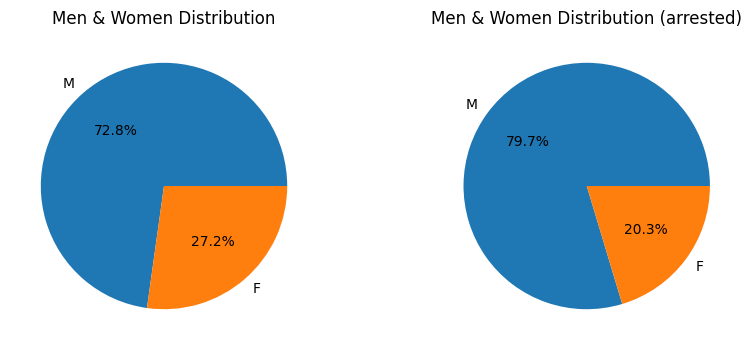

In [ ]:
#Is getting arrested associated with driver gender?
arrested = data[data.is_arrested == True]

fig = plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.pie(data["driver_gender"].value_counts(), labels =data["driver_gender"].value_counts().index, autopct='%.1f%%')
plt.title('Men & Women Distribution')

plt.subplot(122)
plt.pie(arrested["driver_gender"].value_counts(), labels =arrested["driver_gender"].value_counts().index, autopct='%.1f%%')
plt.title('Men & Women Distribution (arrested)')

Man seems to get arrested more than woman

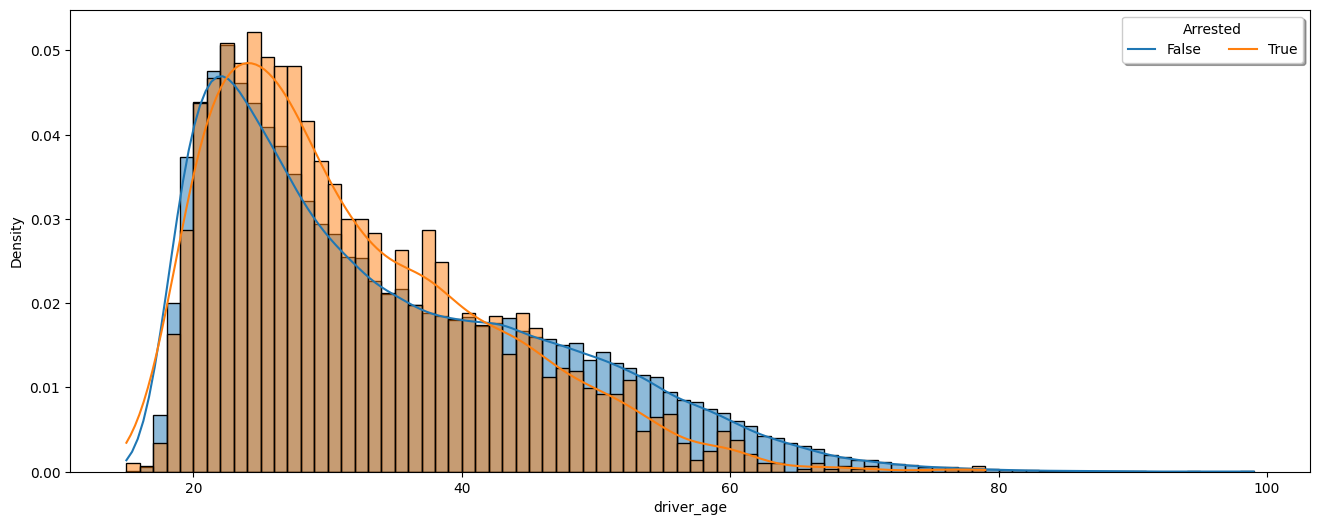

In [ ]:
#Is getting arrested associated with driver age?
arrested = data[data.is_arrested == True]

fig = plt.figure(figsize=(16, 6))

sns.histplot(data['driver_age'], stat = 'density', binwidth=1, kde=True)
sns.histplot(arrested['driver_age'], stat = 'density', binwidth=1, kde=True)

plt.legend(title='Arrested', labels=['False','True'],
           fancybox=True, shadow=True, ncol=2, loc='upper right')
plt.show()


Driver around 20-40 yo get arrested more than driver outside this range

<Axes: xlabel='driver_race', ylabel='count'>

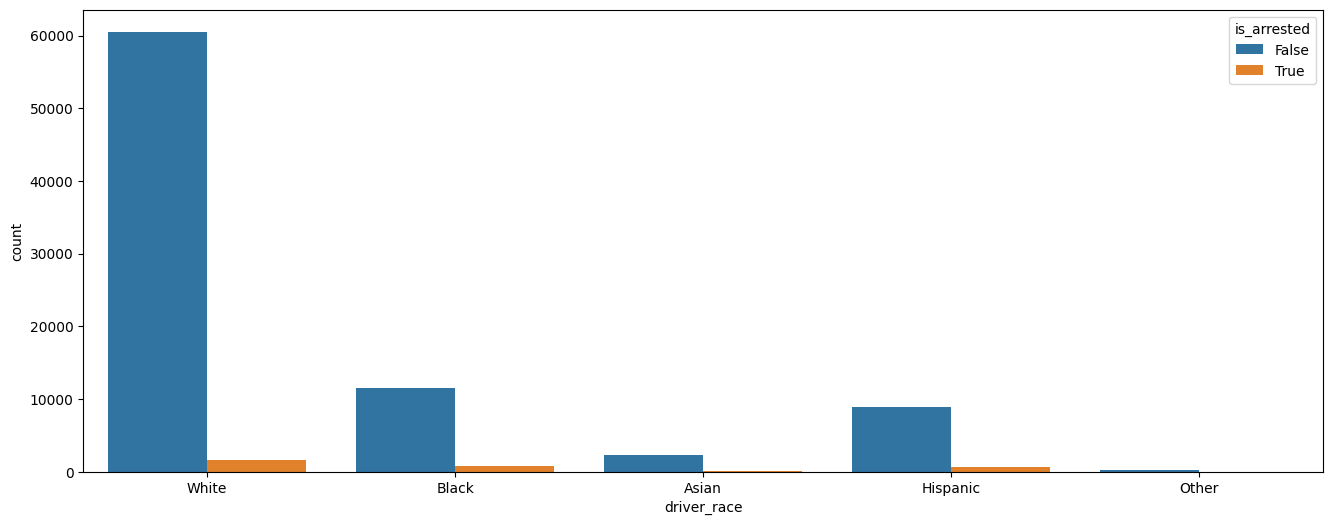

In [ ]:
#Is getting arrested associated with driver race?
plt.figure(figsize=(16, 6))
sns.countplot(x='driver_race', data=data, hue='is_arrested')

The driver race does not seem associated with getting arrested

In [ ]:
#Get dummies variable for boolean data and data with only 2 value types
data['driver_gender'] = data['driver_gender'].map({'F': 1, 'M': 0})
data['is_arrested'] = data['is_arrested'].map({True: 1, False: 0})
data['search_conducted'] = data['search_conducted'].map({True: 1, False: 0})
data['drugs_related_stop'] = data['drugs_related_stop'].map({True: 1, False: 0})


In [ ]:
#Getting dummies for driver race
#sub = data[['is_arrested', 'driver_gender', 'driver_age', 'driver_race']]
dummies = pd.get_dummies(data.driver_race)
merged = pd.concat([data, dummies], axis = 'columns')
df = merged.drop(['driver_race', 'Other'], axis = 'columns')
df

,stop_date,stop_time,driver_gender,driver_age,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,Asian,Black,Hispanic,White
0,2005-01-02,01:55,0,20.0,Speeding,0,Citation,0,0-15 Min,0,0,0,0,1
1,2005-01-18,08:15,0,40.0,Speeding,0,Citation,0,0-15 Min,0,0,0,0,1
2,2005-01-23,23:15,0,33.0,Speeding,0,Citation,0,0-15 Min,0,0,0,0,1
3,2005-02-20,17:15,0,19.0,Other,0,Arrest Driver,1,16-30 Min,0,0,0,0,1
4,2005-03-14,10:00,1,21.0,Speeding,0,Citation,0,0-15 Min,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,20:27,0,29.0,Speeding,0,Warning,0,0-15 Min,0,0,0,0,1
91737,2015-12-31,20:35,1,33.0,Equipment,0,Warning,0,0-15 Min,0,0,0,0,1
91738,2015-12-31,20:45,0,23.0,Moving violation,0,Warning,0,0-15 Min,0,0,0,0,1
91739,2015-12-31,21:42,0,22.0,Speeding,0,Citation,0,0-15 Min,0,0,0,0,1


<ipython-input-313-d101abd1b111>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



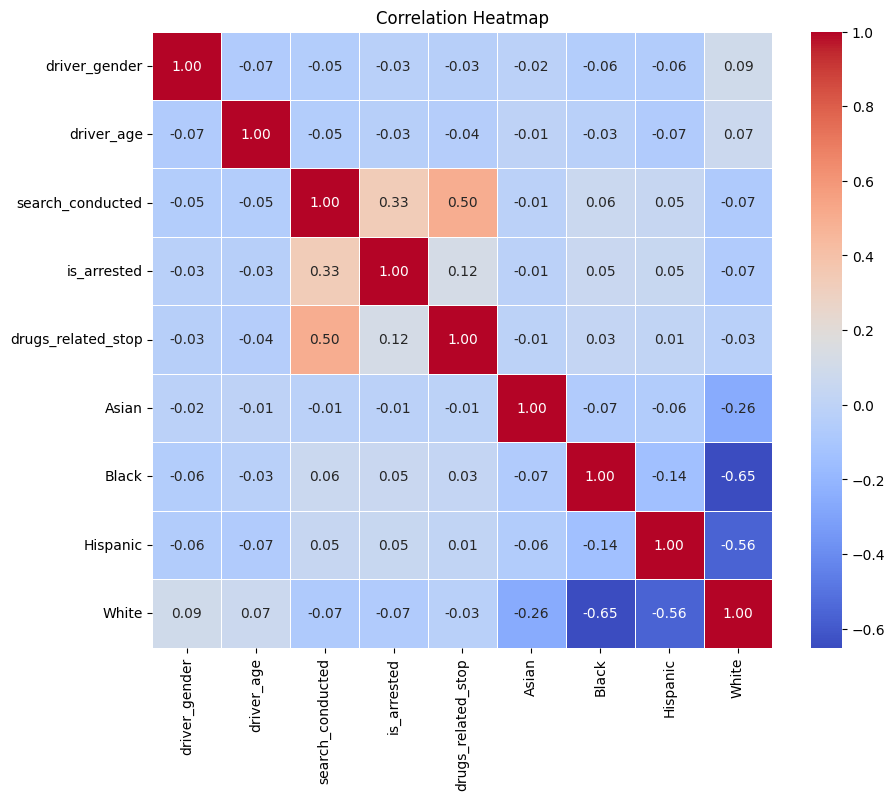

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

-Male driver does not get arrested more than female driver

-Getting arrested is not associated with driver age

-Getting arrested is not associated with driver race


**Side discovery**

-If a search is conducted, it tends to relate to drug